In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [35]:
ds_path='/content/mail_data - mail_data.csv'
df=pd.read_csv(ds_path)

In [36]:
df.sample(10)

,Category,Message
5154,ham,"Like &lt;#&gt; , same question"
1495,ham,It has everything to do with the weather. Keep...
4926,ham,Ok... Let u noe when i leave my house.
2740,ham,Are you this much buzy
4621,ham,THIS IS A LONG FUCKIN SHOWR
2049,ham,So dont use hook up any how
3623,ham,Goin to workout lor... Muz lose e fats...
3856,spam,Free msg: Single? Find a partner in your area!...
523,ham,Were gonna go get some tacos
4776,ham,So many people seems to be special at first si...


In [37]:
df['Category']=df['Category'].map({'spam':0,'ham':1})

In [38]:
df

,Category,Message
0,1,"Go until jurong point, crazy.. Available only ..."
1,1,Ok lar... Joking wif u oni...
2,0,Free entry in 2 a wkly comp to win FA Cup fina...
3,1,U dun say so early hor... U c already then say...
4,1,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,0,This is the 2nd time we have tried 2 contact u...
5568,1,Will ü b going to esplanade fr home?
5569,1,"Pity, * was in mood for that. So...any other s..."
5570,1,The guy did some bitching but I acted like i'd...


In [39]:
x=df['Message']
y=df['Category']


Convert Text Data into Numerical Data

**Vectorization**

I Will use TF_IDF
we will transform each email into numerical vector based on teh TF_IDF SCores

In [40]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer=TfidfVectorizer(stop_words='english',max_features=5000)
x_tf_idf=vectorizer.fit_transform(x)


In [41]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test =  train_test_split(x_tf_idf,y,test_size=0.2,random_state=42)


In [42]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()
log_model.fit(x_train, y_train)

LogisticRegression()

In [43]:
y_predict=log_model.predict(x_test)

In [44]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
def evaluate_model(y_true,y_predict,model_name):
    print(f"\n {model_name} Performance:")
    print(f"Accuracy  : {accuracy_score(y_true, y_predict):.4f}")
    print(f"Precision : {precision_score(y_true, y_predict):.4f}")
    print(f"Recall    : {recall_score(y_true, y_predict):.4f}")
    print(f"F1-score  : {f1_score(y_true, y_predict):.4f}")


In [45]:
evaluate_model(y_test,y_predict,'Logistic Regression')


 Logistic Regression Performance:
Accuracy  : 0.9632
Precision : 0.9593
Recall    : 1.0000
F1-score  : 0.9792


In [46]:
sample_index = np.random.randint(0, x_test.shape[0])
sample_email = x_test[sample_index]
true_label = y_test.iloc[sample_index]

In [47]:
predicted_label = log_model.predict(sample_email)[0]

In [48]:
# Retrieve original text of the selected email
original_email = df.iloc[y_test.index[sample_index]]['Message']

In [49]:
# Display results
print("\n Testing the Model with a Random Sample from the Test Set ")
print(f" **Original Email:** {original_email}")
print(f" **True Label:** {true_label}")
print(f" **Predicted Label:** {predicted_label}")


 Testing the Model with a Random Sample from the Test Set 
 **Original Email:** Hmm well, night night
 **True Label:** 1
 **Predicted Label:** 1


In [50]:
print("\n Model Performance on Test Data ")
print(f"Accuracy  : {accuracy_score(y_test, y_predict):.4f}")
print(f"Precision : {precision_score(y_test, y_predict):.4f}")
print(f"Recall    : {recall_score(y_test, y_predict):.4f}")
print(f"F1-score  : {f1_score(y_test, y_predict):.4f}")


 Model Performance on Test Data 
Accuracy  : 0.9632
Precision : 0.9593
Recall    : 1.0000
F1-score  : 0.9792


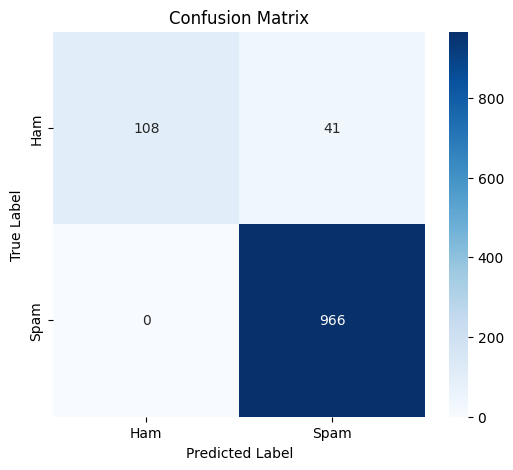

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_predict)

# Plot the confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Ham", "Spam"], yticklabels=["Ham", "Spam"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()



<ipython-input-52-b78ba4d24067>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metrics, y=values, palette="viridis")


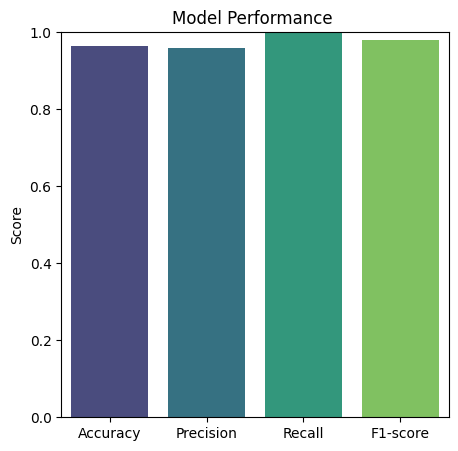

In [52]:
metrics = ["Accuracy", "Precision", "Recall", "F1-score"]
values = [
    accuracy_score(y_test, y_predict),
    precision_score(y_test, y_predict),
    recall_score(y_test, y_predict),
    f1_score(y_test, y_predict)
]

plt.figure(figsize=(5, 5))
sns.barplot(x=metrics, y=values, palette="viridis")
plt.ylim(0, 1)
plt.ylabel("Score")
plt.title("Model Performance ")
plt.show()
